In [4]:
using Pkg; Pkg.activate(".")

Activating environment at `~/EcoNetworksLabs/Project.toml`


## Installation of the required packages

For this module, we will need the following packages:

In [5]:
Pkg.add("EcologicalNetworks")
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("StatsBase")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed PlotThemes ──────── v0.4.0
 Installed FFMPEG ──────────── v0.2.3
 Installed Compat ──────────── v2.2.0
 Installed CategoricalArrays ─ v0.7.1
 Installed Polynomials ─────── v0.5.3
 Installed PlotUtils ───────── v0.6.0
  Updating `~/EcoNetworksLabs/Project.toml`
 [no changes]
  Updating `~/EcoNetworksLabs/Manifest.toml`
  [324d7699] ↑ CategoricalArrays v0.6.0 ⇒ v0.7.1
  [34da2185] ↑ Compat v2.1.0 ⇒ v2.2.0
  [9a962f9c] ↑ DataAPI v1.0.1 ⇒ v1.1.0
  [864edb3b] ↑ DataStructures v0.17.0 ⇒ v0.17.2
  [c87230d0] ↑ FFMPEG v0.2.2 ⇒ v0.2.3
  [e1d29d7a] ↑ Missings v0.4.2 ⇒ v0.4.3
  [ccf2f8ad] ↑ PlotThemes v0.3.0 ⇒ v0.4.0
  [995b91a9] ↑ PlotUtils v0.5.8 ⇒ v0.6.0
  [f27b6e38] ↑ Polynomials v0.5.2 ⇒ v0.5.3
  Building FFMPEG → `~/.julia/packages/FFMPEG/bkWgb/deps/build.log`
 Resolving package versions...
  Updating `~/EcoNetworksLabs/Project.t

Now that the packages are installed, we can load them.

In [6]:
using EcologicalNetworks
using Plots
using StatsBase
using Random

## Loading a network

To illustrate NHST, we will take one host-parasite network, remove the quantitative information, and then assign it to a variable named `N`.

In [7]:
N = convert(BipartiteNetwork, web_of_life("A_HP_001"))

18×10 bipartite  ecological network (Bool, String) (L: 61)

The first step is to get the *observed* value of the quantity of interest, for example NODF:

In [8]:
obs = nodf(N)

0.639664124909223

As a second step, we need to transform this network into a probabilistic network, using one of the standard null models. In this example, we will use the type II null model, which accounts for the degree distribution of both sides of the network:

In [9]:
template = null2(N)

18×10 bipartite probabilistic ecological network (Float64, String) (L: 60.99999999999999)

Note that the value of $L$ might be slightly different from what it said in the deterministic network. This is because numbers are difficult to represent for computers, and this will not have too much adverse effects.

From this template, we want to generate *a lot* of random networks. `EcologicalNetworks` extends the usual *Julia* functions, so we can call `rand`:

In [10]:
draws = rand(template, 10_000)

10000-element Array{BipartiteNetwork{Bool,String},1}:
 18×10 bipartite  ecological network (Bool, String) (L: 78)
 18×10 bipartite  ecological network (Bool, String) (L: 58)
 18×10 bipartite  ecological network (Bool, String) (L: 59)
 18×10 bipartite  ecological network (Bool, String) (L: 65)
 18×10 bipartite  ecological network (Bool, String) (L: 53)
 18×10 bipartite  ecological network (Bool, String) (L: 62)
 18×10 bipartite  ecological network (Bool, String) (L: 58)
 18×10 bipartite  ecological network (Bool, String) (L: 68)
 18×10 bipartite  ecological network (Bool, String) (L: 68)
 18×10 bipartite  ecological network (Bool, String) (L: 58)
 18×10 bipartite  ecological network (Bool, String) (L: 60)
 18×10 bipartite  ecological network (Bool, String) (L: 62)
 18×10 bipartite  ecological network (Bool, String) (L: 51)
 ⋮                                                         
 18×10 bipartite  ecological network (Bool, String) (L: 63)
 18×10 bipartite  ecological network (Bool, St

This will have generated $10^3$ networks. Each of these networks is generated in the following way: every interactions is considered to be a probability $p$, and the network is filled with the output of a Bernoulli trial with probability of success $p$. For example, if the null model says that an interaction has a probability of $0.5$, we expect that about half of the random draws will have this interaction.

We can now have a look at the values of NODF in this random sample. The `f.(x)` notation means "apply `f` to every element of `x`".

In [12]:
r = nodf.(draws)

10000-element Array{Float64,1}:
   0.5651478369125429 
   0.4446184534419828 
 NaN                  
   0.5130939412802157 
 NaN                  
   0.4567211328976035 
   0.3360955493308434 
   0.4568681917211329 
 NaN                  
 NaN                  
   0.4103516962340491 
 NaN                  
 NaN                  
   ⋮                  
 NaN                  
   0.472307033924681  
   0.4986990351696233 
   0.4949618736383442 
 NaN                  
   0.4554038281979459 
 NaN                  
   0.43785117750804026
 NaN                  
   0.5464379084967319 
 NaN                  
   0.4361105923851023 

Weird, some of these networks have a value of `NaN`. This is because some of the random networks are *degenerate*, *i.e.* they have species with no interactions left. Let's remove them.

The `filter(condition, collection)` function will select only the elements of `collection` which satisfy `condition` (which is a function). In this case, we use `!isdegenerate`, *i.e.* the opposite of "is the network degenerate", to return only networks with connected species. 

Note that we use the `filter!` function - it *modifies* the collection on which it is called. By convention, *Julia* function ending with `!` will change their arguments.

In [15]:
filter!(!isdegenerate, draws)

5499-element Array{BipartiteNetwork{Bool,String},1}:
 18×10 bipartite  ecological network (Bool, String) (L: 78)
 18×10 bipartite  ecological network (Bool, String) (L: 58)
 18×10 bipartite  ecological network (Bool, String) (L: 65)
 18×10 bipartite  ecological network (Bool, String) (L: 62)
 18×10 bipartite  ecological network (Bool, String) (L: 58)
 18×10 bipartite  ecological network (Bool, String) (L: 68)
 18×10 bipartite  ecological network (Bool, String) (L: 60)
 18×10 bipartite  ecological network (Bool, String) (L: 64)
 18×10 bipartite  ecological network (Bool, String) (L: 55)
 18×10 bipartite  ecological network (Bool, String) (L: 66)
 18×10 bipartite  ecological network (Bool, String) (L: 60)
 18×10 bipartite  ecological network (Bool, String) (L: 64)
 18×10 bipartite  ecological network (Bool, String) (L: 66)
 ⋮                                                         
 18×10 bipartite  ecological network (Bool, String) (L: 68)
 18×10 bipartite  ecological network (Bool, Str

In [16]:
nodf_random = nodf.(draws)

5499-element Array{Float64,1}:
 0.5651478369125429 
 0.4446184534419828 
 0.5130939412802157 
 0.4567211328976035 
 0.3360955493308434 
 0.4568681917211329 
 0.4103516962340491 
 0.4737986305633365 
 0.44603485838779955
 0.4927723311546841 
 0.5005174291938997 
 0.44060846560846556
 0.4451167133520074 
 ⋮                  
 0.4976470588235295 
 0.48643531486668734
 0.46472766884531574
 0.3542211328976035 
 0.5516918248780993 
 0.472307033924681  
 0.4986990351696233 
 0.4949618736383442 
 0.4554038281979459 
 0.43785117750804026
 0.5464379084967319 
 0.4361105923851023 

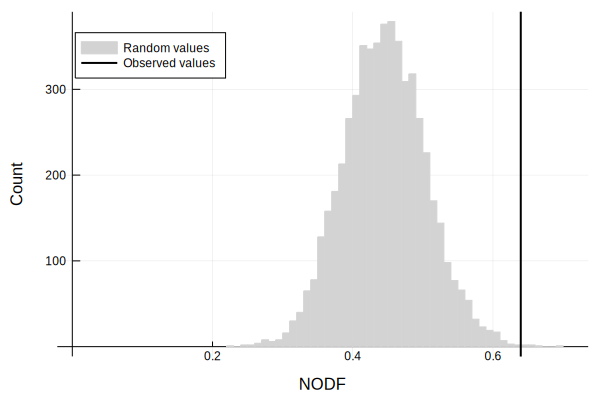

In [26]:
histogram(nodf_random, lab="Random values", c=:lightgrey, lc=:lightgrey, frame=:origin, legend=:topleft)
vline!([nodf(N)], lab="Observed values", c=:black, lw=2)
xaxis!("NODF")
yaxis!("Count")

In [28]:
1.0-sum(nodf_random .<= nodf(N))/length(nodf_random)

0.0010911074740862503